#### EDA Switzerland Games

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('switzerland_final.csv')

In [5]:
df

,Unnamed: 0,Player1_Name,Player1_Height,Tournament,Location,Ground,Prize,GameRound,Player2_Rank,Num_Sets,TotalPoints,Start_Date,End_Date,Tornament_Days,GameId,Player2_Name,Player2_Height,Player1_Rank,Rank_Diff
0,0,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 16,64,2,15,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,1,63
1,1,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 32,47,3,30,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,1,46
2,2,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Semi-Finals,32,2,23,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F...",Viktor Troicki,193,3,29
3,3,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Quarter-Finals,66,2,17,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Quarte...",Robin Haase,191,3,63
4,4,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Round of 32,26,2,18,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Round ...",Ernests Gulbis,191,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,4922,Juan Manuel Benitez Chavarriaga,184,Switzerland F3,"Collonge-Bellerive, Switzerland",Clay,15000.0,Round of 16,1011,2,18,2017-08-14,2017-08-20,6,"Switzerland F3_Collonge-Bellerive, Switzerland...",Loic Perret,188,646,365
4923,4923,Marvin Moeller,178,M25 Trimbach,"Trimbach, Switzerland",Carpet,25000.0,Round of 32,1298,3,28,2021-03-08,2021-03-14,6,"M25 Trimbach_Trimbach, Switzerland_Carpet_2500...",Patrik Hartmeier,184,614,684
4924,4924,Marvin Moeller,178,Switzerland F5,"Sion, Switzerland",Clay,15000.0,Round of 32,545,3,29,2017-08-28,2017-09-03,6,"Switzerland F5_Sion, Switzerland_Clay_15000.0_...",Pascal Meis,180,1128,583
4925,4925,Maxence Beauge,183,Switzerland F3,"Collonge-Bellerive, Switzerland",Clay,15000.0,Round of 32,941,2,20,2017-08-14,2017-08-20,6,"Switzerland F3_Collonge-Bellerive, Switzerland...",Issei Okamura,170,1325,384


In [6]:
len(df)

4927

In [7]:
df['Height_Diff'] = abs(df["Player1_Height"] - df["Player2_Height"])

In [14]:

# supondo que o DataFrame é chamado de "df"
df.loc[df['Height_Diff'] == 183]


,Unnamed: 0,Player1_Name,Player1_Height,Tournament,Location,Ground,Prize,GameRound,Player2_Rank,Num_Sets,TotalPoints,Start_Date,End_Date,Tornament_Days,GameId,Player2_Name,Player2_Height,Player1_Rank,Rank_Diff,Height_Diff
586,586,Facundo Bagnis,183,Lugano,"Lugano, Switzerland",Clay,85000.0,1st Round Qualifying,1001,2,21,2010-06-07,2010-06-13,6,"Lugano_Lugano, Switzerland_Clay_85000.0_1st Ro...",Riccardo Maiga,0,310,691,183
822,822,Gregoire Barrere,183,Switzerland F2,"Bellevue, Switzerland",Carpet,25000.0,Round of 16,1097,3,31,2017-02-13,2017-02-19,6,"Switzerland F2_Bellevue, Switzerland_Carpet_25...",Riccardo Maiga,0,281,816,183
1660,1660,Tristan Schoolkate,183,M25 Sierre,"Sierre, Switzerland",Clay,25000.0,Round of 32,566,3,33,2021-08-30,2021-09-05,6,"M25 Sierre_Sierre, Switzerland_Clay_25000.0_Ro...",Luca Potenza,0,747,181,183
3697,3697,Roko Karanusic,183,Chiasso,"Chiasso, Switzerland",Clay,25000.0,Quarter-Finals,247,3,32,2007-04-09,2007-04-15,6,"Chiasso_Chiasso, Switzerland_Clay_25000.0_Quar...",Simone Vagnozzi,0,150,97,183
3871,3871,Dmitri Sitak,183,Geneva,"Geneva, Switzerland",Clay,30000.0,2nd Round Qualifying,1001,2,14,2009-08-17,2009-08-23,6,"Geneva_Geneva, Switzerland_Clay_30000.0_2nd Ro...",Riccardo Maiga,0,802,199,183
4199,4199,Leonel Alberti,0,Lugano,"Lugano, Switzerland",Clay,85000.0,1st Round Qualifying,1001,2,22,2009-06-08,2009-06-14,6,"Lugano_Lugano, Switzerland_Clay_85000.0_1st Ro...",Luca Margaroli,183,1094,93,183


In [26]:


# Codificar as variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['Ground'])

df_encoded = df_encoded.drop(columns=['Player1_Name', 'Unnamed: 0','Player1_Height','Player2_Rank','TotalPoints','Player2_Height','Player1_Rank'])

# Calcular a matriz de correlação
matriz_corr = df_encoded.corr()

matriz_corr

C:\Users\berna\AppData\Local\Temp\ipykernel_13108\960388155.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df_encoded.corr()


,Prize,Num_Sets,Tornament_Days,Rank_Diff,Height_Diff,Ground_Carpet,Ground_Clay,Ground_Hard
Prize,1.000000,0.015180,-0.139117,-0.297244,-0.034307,-0.206635,-0.256586,0.538362
Num_Sets,0.015180,1.000000,0.005560,-0.083539,0.010183,-0.022298,-0.014791,0.042202
Tornament_Days,-0.139117,0.005560,1.000000,0.070784,0.002010,0.370916,-0.246562,-0.095044
Rank_Diff,-0.297244,-0.083539,0.070784,1.000000,0.022876,0.146679,0.001146,-0.159140
Height_Diff,-0.034307,0.010183,0.002010,0.022876,1.000000,0.001411,0.021240,-0.027689
Ground_Carpet,-0.206635,-0.022298,0.370916,0.146679,0.001411,1.000000,-0.631927,-0.296672
Ground_Clay,-0.256586,-0.014791,-0.246562,0.001146,0.021240,-0.631927,1.000000,-0.552661
Ground_Hard,0.538362,0.042202,-0.095044,-0.159140,-0.027689,-0.296672,-0.552661,1.000000


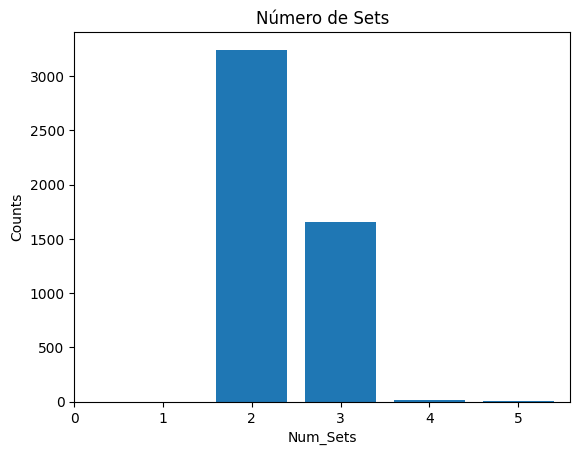

,Num_Sets,Counts
0,2,3243
1,3,1657
2,4,18
3,5,9


In [14]:
sets_count = df.groupby('Num_Sets').size().reset_index(name='Counts')
plt.bar(sets_count['Num_Sets'], sets_count['Counts'])

#for i in range(len(df)):
    #plt.text(sets_count['Num_Sets'][i], sets_count['Counts'][i], str(sets_count['Counts'][i]), ha='center', va='bottom')
plt.xlabel('Num_Sets')
plt.xticks(range(0, 6, 1))
plt.ylabel('Counts')
plt.title('Número de Sets')
plt.show()
sets_count

In [12]:
df['Num_Sets'].unique()

array([2, 3, 5, 4], dtype=int64)

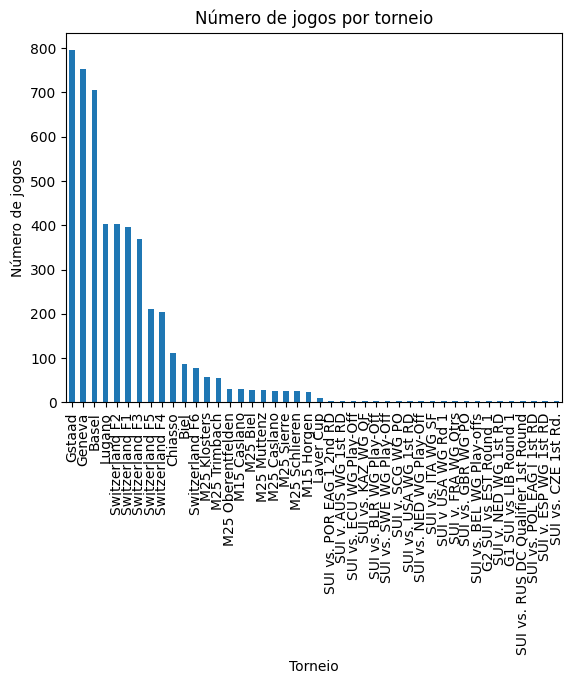

Gstaad                                795
Geneva                                754
Basel                                 705
Lugano                                403
Switzerland F2                        402
Switzerland F1                        397
Switzerland F3                        370
Switzerland F5                        211
Switzerland F4                        204
Chiasso                               111
Biel                                   86
Switzerland F6                         77
M25 Klosters                           58
M25 Trimbach                           55
M25 Oberentfelden                      30
M15 Caslano                            30
M25 Biel                               28
M25 Muttenz                            27
M25 Caslano                            26
M25 Sierre                             26
M25 Schlieren                          25
M15 Horgen                             23
Laver Cup                               9
SUI vs. POR EAG 1 2nd RD          

In [11]:
counts = df['Tournament'].value_counts()

# Cria um gráfico de barras
counts.plot(kind='bar')

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('Torneio')
plt.ylabel('Número de jogos')
plt.title('Número de jogos por torneio')

# Mostra o gráfico na tela
plt.show()

counts

In [21]:
len(df['Player1_Name'].unique())

978

In [26]:
len(df['Player2_Name'].unique())

1400